# Module 6 Practice Exercise

Goal: Work with **sampling**, **empirical distribution**, **hypothesis testing**

In this exercise we work with the Titanic dataset, one of the commonly used datasets in data science classes. The dataset contains the data for passengers on the infamous Titanic, a luxury ship that sank in the Atlantic in the early 1900's.

- Run the Code cell below to read in data and store in a **DataFrame** named **`df`**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read file into df
url = 'https://raw.githubusercontent.com/DeAnzaDataScience/CIS11/main/datasets_exercises/titanic_original.csv'
df = pd.read_csv(url)

# show last part of df
print("Dataset preview, last 5 rows:")
df.tail()

Dataset preview, last 5 rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The NaN values seen above mean the data are missing (NaN is short for Not a Number).<br>
For this exercise we'll look at the passengers age only, so we **remove** the rows with **NaN** in the **`age` column**.<br>
<i>Note: this is an extra step to show how data sometimes need to be **cleaned** before we can do analysis. You don't have to clean data for data used in the class notes and assignments.</i>

- Run the Code cell to remove rows with NaN in the **`age`** column

In [ ]:
df_cleaned = df.dropna(subset=['age'])

print("the total number of original passenger data records is:", len(df))
print("the total number of cleaned passenger data records is:", len(df_cleaned))

print("First and last 5 rows:")
df_cleaned   # shows the first 5 rows and the last 5 rows

the total number of original passenger data records is: 1310
the total number of cleaned passenger data records is: 1046
First and last 5 rows:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5000,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Part 1. Sampling

In this part of the exercise, we explore how sampling works to give us an estimate of a statistic of the entire population.

In this case, the entire population is the cleaned dataset of passengers, **`df_cleaned`**.<br>
A **statistic** of the dataset is the **median of the age** of the passengers.<br>

We want to see if, by working with a large number of samples, we can infer the median age of all the passengers.

1. **First** we find the **median age** of all the passengers, which is the statistic of **the entire population of passengers**.
  
1a. We look at the age distribution of all passengers in **`df_cleaned`** to get an overview of the age.
- Run the Code cell to view the histogram of the passengers' age.

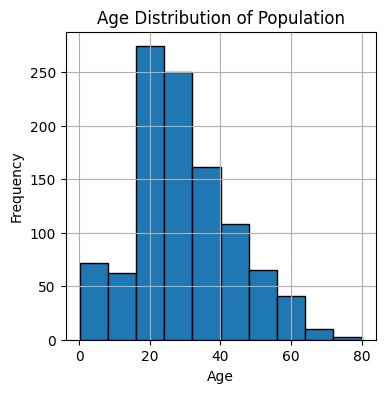

In [ ]:
plt.figure(figsize=(4, 4))
plt.hist(df_cleaned['age'], edgecolor='black')
plt.title("Age Distribution of Population")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid()
plt.show()

1b. Fill in code below to find and print the **median age of the passengers**.

In [ ]:
population_median_age = np.median(df_cleaned.age)
# alternately: population_median_age = np.median(df_cleaned['age'])
print("Population Median Age:", population_median_age)

Population Median Age: 28.0


This population median age is what we want to arrive at when we sample.

Now suppose we ***don't know and can't easily find the population median age***. But, by analyzing small samples of the passengers, we can **estimate the correct median age for all the passengers (or the population**).

2. We take a random sample of **100 passengers**.

2a. Write a function named **`sampling`** that will:
- **create** a random sample of **100 passengers**
- **find** their **median age** and return the **median age**

Then run the Code cell to let Python know about the function.

In [ ]:
def sampling():
    sample_100 = df_cleaned.sample(100)
    return np.median(sample_100.age)

2b. Write code to call the **`sampling`** function and print the **median age**.

In [ ]:
print("Median age of sample:",sampling()  )

Median age of sample: 27.5


2c. Run the Code cell of part 2b a couple times. What do you notice about the output?<br>
In the Text cell, enter the output of 4 different times that you run the code.

The output are:  We get a different answer each time because of the sample size is only 100 out of thousands.
26.0
28.5
27.5
28.0

3. We repeat the sampling **5000** times and plot the distribution of the resulting 5000 medians of the samples.

3a. Fill in the code below to repeat the sampling **5000** times and store the medians in the list **L**.<br>
Then convert **L to an array** and **print the number of data values in the array.**

In [ ]:
L = []
for i in range(10):
    sample_median =  sampling()
    print(sample_median)
    L.append( sample_median )

median_array = np.array(L)
print(len(median_array))

30.0
30.5
29.0
29.0
28.0
25.0
29.0
29.0
28.0
30.0
10


3b. Fill in the code below to plot the distribution of `median_array`.

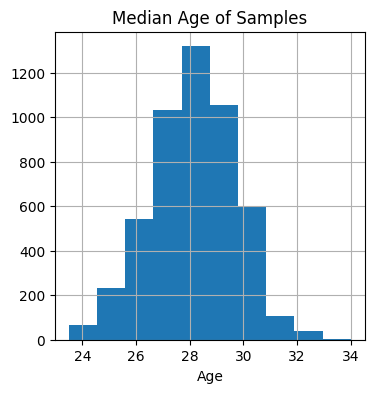

In [ ]:
plt.figure(figsize=(4, 4))
plt.hist(median_array)

plt.title("Median Age of Samples")
plt.xlabel("Age")
plt.grid()
plt.show()

3c. Based on the distribution above:
- What's the age range that has the most number of sample median age?<br>
- Does the estimate age range agree with the actual population median age found in part 1b?

Use the Text cell below for your answers.

The age range with the most number of sample median age is = 28

Compared with the actual population median age of 28, this is ...

## Part 2: Hypothesis Testing

In this part of the exercise, we explore forming hypotheses about the data, and then using sampling to determine if our hypothesis is correct or not.

4. <u>The first step in hypothesis testing</u> is to d**etermine what the test statistic is**. It is the test statistic that the hypothesis is about.

Since we're working with the passengers' age, the statistic we'll investigate is the median age difference between the male and female passengers.
Just like in Part 1, we'll first find the actual median age difference between male and female passengers, and then see if our sampling can lead us to the actual age difference.

4a. We work with the female passengers. Fill in the following Code cell to:
- **Create** the **`df_female`** DataFrame, which contains all rows of the female passengers.
- **Find** and **print** the **number** of female passengers.
- **Find** and **print** the **ratio** of female passengers / total passengers

In [ ]:
df_female = df_cleaned[df_cleaned.sex == 'female']
num_female = len(df_female)
female_ratio = round(num_female / len(df_cleaned),1)

print("Number of female passengers:", num_female)
print("Ratio of female passengers:", female_ratio)

Number of female passengers: 388
Ratio of female passengers: 0.4


4b. Do the same for the **male** passengers.
- Create a **`df_male`** DataFrame for the male passengers.
- **Find** and **print** the **number** of **male** passengers.
- **Find** and **print** the **ratio** of **male** passengers / total passengers                       

In [ ]:
df_male = df_cleaned[df_cleaned.sex == 'male']
num_male = len(df_male)
male_ratio = round(num_male / len(df_cleaned),1)

print("Number of male passengers:", num_male)
print("Ratio of male passengers:", male_ratio)

Number of male passengers: 658
Ratio of male passengers: 0.6


4c. We find the actual median age difference for all passengers (the entire population).

Run the Code cell below to find the difference.

In [ ]:
np.abs(np.median(df_female_age) - np.median(df_male_age))

NameError: name 'df_female_age' is not defined

**5**. **<u>The second step in hypothesis testing</u>** is to formulate the hypotheses on the test statistic.

Given the description of the null hypothesis and the alternative hypothesis, write your 2 hypotheses in the Text cell below.

Null hypothesis: No Differences between the median ages for male vs female

Alternative hypothesis: There is a difference between the median ages of males vs female

6. <u>The third step in hypothesis testing</u> is the simulation and empirical distribution.

6a. Fill in the Code cell below to create the function `sample_with_proportions`, which:
- Takes a sample of passengers based on the male/female ratio
- Find and return the difference in median age

In [ ]:
def sample_with_proportions(sample_size):
    # take a sample of sample_size passengers with proportions of male/female
    num_male = int(male_ratio * sample_size)
    num_female = int(female_ratio * sample_size)
    a_sample = pd.concat([df_female.sample(num_female), df_male.sample(num_male)],
                          ignore_index=True)

    # find the median female age in a_sample
    median_female_age = np.median(a_sample[a_sample.sex == 'female'].age)
    # find the median male age in a_sample
    median_male_age = np.median(a_sample[a_sample.sex == 'male'].age)
    # return the absolute value of the difference in median ages
    return np.abs(median_male_age - median_female_age)

6b. Fill in the code below to:
- create a sample of 200 passengers and find the median age difference between male and female
- repeat the sampling 5000 times and store the median age differences in `result_array`

In [ ]:
L = []
for i in range(5000):
    L.append(sample_with_proportions(200))

result_array = np.array(L)

6c. Fill in the code below to plot the distribution of the median age differences from the samples.<br>
The distribution is the empirical distribution.

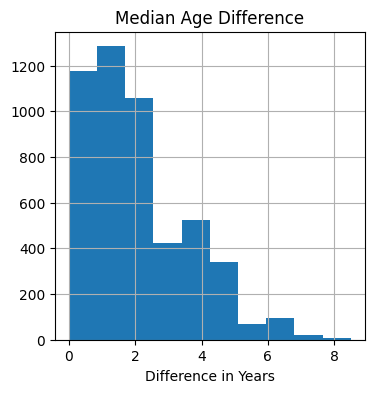

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(result_array)

plt.title("Median Age Difference")
plt.xlabel("Difference in Years")
plt.grid()
plt.show()

6d. <u>The fourth step in hypothesis testing</u> is to evaluate the hypotheses with the empirical results.<br>
Does the empirical distribution <i>reject</i> or <i>fail to reject</i> the null hypothesis?

Use the Text cell below to explain your answer.

The empirical distribution The Null Hypothisis is rejected because the ages show differences



